In [1]:
import scipy.constants as sc_c

In [2]:
print(sc_c.physical_constants['electron volt-joule relationship'])

(1.602176634e-19, 'J', 0.0)


(-15.487260989792858, 7.835588178295438e-09)
(-15.48726098952816, 1.719431373895315e-13)


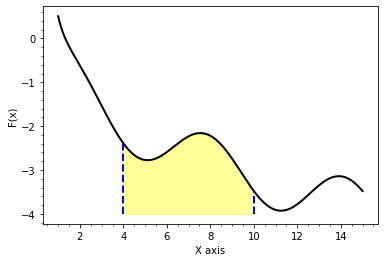

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as sc_integ

# Define a function.
def IntFunc(x):
    return 1./x**2 + 0.6*np.sin(x) - np.sqrt(x)

#Plot the function.
x = np.linspace(1.0, 15.0,256)
y = IntFunc(x)
plt.plot(x, y, 'k', lw=2)
plt.plot([4.0,4.0],[-4.0,IntFunc(4.0)], 'b--',lw=2)
plt.plot([10.0,10.0],[-4.0,IntFunc(10.0)], 'b--',lw=2)
in1 = np.abs(x-4.0).argmin()
in2 = np.abs(x-10.0).argmin()
plt.fill_between(x[in1:in2], -4.0, IntFunc(x[in1:in2]),color='yellow',alpha=0.4)
plt.xlabel(r'X axis')
plt.ylabel(r'F(x)')
plt.minorticks_on()


# Integrate.
ans_q1 = sc_integ.quadrature(IntFunc, 4.0, 10.0, rtol=1.0e-8)
ans_q2 = sc_integ.quad(IntFunc, 4.0, 10.0)
print(ans_q1)
print(ans_q2)

Trapezoidal rule : 9.209541e+00
simpson's rule : 9.209680e+00


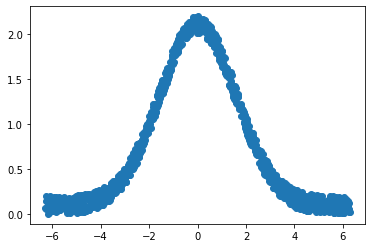

In [15]:
Nmax=1024;
x = np.linspace(-2.0*np.pi, 2.0*np.pi,Nmax)
y = 2.0*np.exp(-x*x/5.0) + 0.2*np.random.rand(Nmax)
plt.scatter(x, y)

print("Trapezoidal rule : %12.6e"%sc_integ.trapz(y,x=x))
print("simpson's rule : %12.6e"%sc_integ.simps(y,x=x))


In [17]:
import scipy.optimize as sc_opt

Text(0, 0.5, 'Y axis')

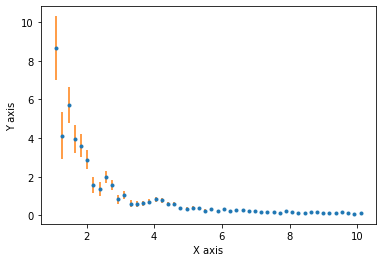

In [18]:
np.random.seed(1894)
# Power Law data. 

powerlaw = lambda x, amp, index: amp*(x**index)

npts = 50
xdata = np.linspace(1.1,10.1,npts)
ydata = powerlaw(xdata, 10.0, -2.0)      # This is exact data
yerr  = 0.2*ydata                        # Some error

ydata += np.random.randn(npts) * yerr    # simulated noisy data

plt.plot(xdata, ydata, 'o',markersize=3)
plt.errorbar(xdata, ydata,yerr, fmt='none')
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')

[ 9.78912966 -1.95199441]
[0.4139334  0.08664355]


Text(0.4, 0.55, 'Best Fit Index         : -1.9520 $\\pm$ 0.09')

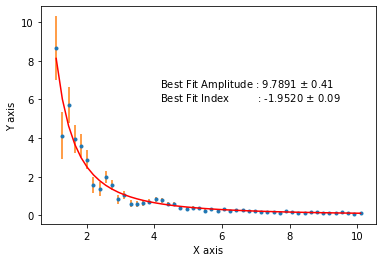

In [19]:
# Now fitting the data using scipy optimize.
coeffp, covarp = sc_opt.curve_fit(powerlaw, xdata, ydata)
print(coeffp)
coeffp_err = np.sqrt(np.diag(covarp))
print(coeffp_err)

plt.plot(xdata, ydata, 'o',markersize=3)
plt.errorbar(xdata, ydata,yerr, fmt='none')
plt.xlabel(r'X axis')
plt.ylabel(r'Y axis')
plt.plot(xdata, powerlaw(xdata, *coeffp), 'r')
plt.figtext(0.4, 0.6, r'Best Fit Amplitude : %.4f $\pm$ %.2f'%(coeffp[0], coeffp_err[0]))
plt.figtext(0.4, 0.55, r'Best Fit Index         : %.4f $\pm$ %.2f'%(coeffp[1], coeffp_err[1]))